In [1]:
#Unique
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#import csv file
df = pd.read_csv('Job_Environment.csv')
print(df.head())

#Find the unique country in dataframe from the file
unique_country = df.Country.unique()
print('Unique Country:', unique_country, '\n')

#Find the unique Components in dataframe from the file
unique_Components = df.Components.unique()
print('Unique Components:', unique_Components, '\n')

#Find the unique Age in dataframe from the file
unique_Age = df.Age.unique()
print('Unique Age:', unique_Age, '\n')

#Find the unique Sex in dataframe from the file
unique_Sex = df.Sex.unique()
print('Unique Sex:', unique_Sex, '\n')

#Find the unique EDU in dataframe from the file
unique_EDU = df.EDU.unique()
print('Unique EDU:', unique_EDU, '\n')

  LOCATION    Country MEA   Overall measure  VAR  \
0      AUS  Australia  EQ  Earnings quality    3   
1      AUS  Australia  EQ  Earnings quality    3   
2      AUS  Australia  EQ  Earnings quality    3   
3      AUS  Australia  EQ  Earnings quality    3   
4      AUS  Australia  EQ  Earnings quality    3   

                                          Components POP    Age SEX    Sex  \
0  Earnings quality (in constant prices, at const...  TP  Total  TP  Total   
1  Earnings quality (in constant prices, at const...  TP  Total  TP  Total   
2  Earnings quality (in constant prices, at const...  TP  Total  TP  Total   
3  Earnings quality (in constant prices, at const...  TP  Total  TP  Total   
4  Earnings quality (in constant prices, at const...  TP  Total  TP  Total   

   ...  Time Unit Code       Unit  PowerCode Code PowerCode  \
0  ...  2005       USD  US Dollar               0     Units   
1  ...  2006       USD  US Dollar               0     Units   
2  ...  2007       USD  US Do

In [2]:
#Give a number to each category

#Countries 
a = pd.factorize(unique_country)

country = {'Australia':1, 'Austria':2, 'Belgium':3, 'Canada':4, 'Czech Republic':5, 'Denmark':6,
 'Finland':7, 'France':8, 'Germany':9, 'Greece':10, 'Hungary':11, 'Ireland':12, 'Italy':13, 'Japan':14,
 'Korea':15, 'Luxembourg':16, 'Mexico':17, 'Netherlands':18, 'New Zealand':19, 'Norway':20,
 'Poland':21, 'Portugal':22, 'Slovak Republic':23, 'Spain':24, 'Sweden':25, 'Turkey':26,
 'United Kingdom':27, 'United States':28, 'Estonia':29, 'Israel':30, 'Slovenia':31,
 'Lithuania':32, 'Iceland':33, 'Latvia':34, 'Chile':35, 'Switzerland':36}

df.Country = [country[item] for item in df.Country]

#Components
a = pd.factorize(unique_Components)
components = {'Earnings quality (in constant prices, at constant PPPs)':1, 'Labour market insecurity':2,  'Job Strain':3}
df.Components = [components[item] for item in df.Components]

#Sex
a = pd.factorize(unique_Sex)
gender = {'Total':1, 'Women':2, 'Men': 3}
df.Sex = [gender[item] for item in df.Sex]


#Age
#a = pd.factorize(unique_Age)
age = {'Total':1, 'Population 15-29':2, 'Population 30-49':3, 'Population 50-64':4}
df.Age = [age[item] for item in df.Age]

#Edu
#a = pd.factorize(unique_EDU)
edu = {'HS':1, 'MS':2, 'LS':3, 'TP':4}
df.EDU = [edu[item] for item in df.EDU]

print(df)




     LOCATION  Country  MEA           Overall measure  VAR  Components    POP  \
0         AUS        1   EQ          Earnings quality    3           1     TP   
1         AUS        1   EQ          Earnings quality    3           1     TP   
2         AUS        1   EQ          Earnings quality    3           1     TP   
3         AUS        1   EQ          Earnings quality    3           1     TP   
4         AUS        1   EQ          Earnings quality    3           1     TP   
...       ...      ...  ...                       ...  ...         ...    ...   
6111      LVA       34  LMI  Labour market insecurity    2           2  15_29   
6112      LVA       34  LMI  Labour market insecurity    2           2  15_29   
6113      LVA       34  LMI  Labour market insecurity    2           2  15_29   
6114      LVA       34  LMI  Labour market insecurity    2           2  15_29   
6115      LVA       34  LMI  Labour market insecurity    2           2  15_29   

      Age SEX  Sex  ...  Ti

In [3]:
#Import the essential libraries
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#X-values and y-values
X = df[['Sex', 'Country', 'Age', 'EDU', 'Components', 'Time']]
y = df['Value'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Linear Regression

R2_score =  0.050852209688465266


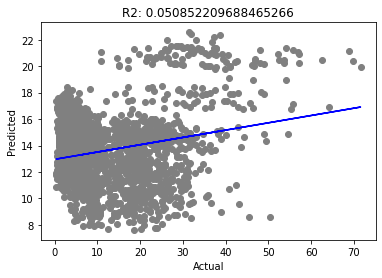

In [4]:
#Split into training and test dataset
#Import the essential libraries
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

lin = linear_model.LinearRegression()

#Train the model using the training set
lin.fit(X_train, y_train)

#Make predictions
y_pred = lin.predict(X_test)

#Evaluate the model
print("R2_score = ", r2_score(y_test,y_pred))

#Scatter plot
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, color = 'grey')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')


#regression line
y_test, y_pred = y_test.reshape(-1,1), y_pred.reshape(-1,1)
ax.plot(y_test, LinearRegression().fit(y_test, y_pred).predict(y_test), color = 'blue')
ax.set_title('R2: ' + str(r2_score(y_test, y_pred)))
plt.show()




# Decision Tree Regressor

r2_score =  0.9294138870697629


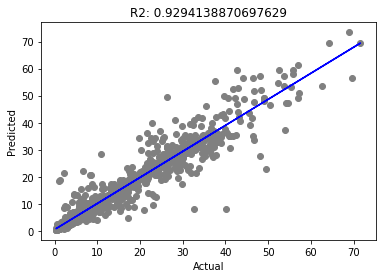

In [5]:
#Decision Tree Regressor
#Import the essential libraries
from sklearn.tree import DecisionTreeRegressor

X = df[['VAR', 'Sex', 'Country', 'Age', 'EDU', 'Components', 'Time']]
y = df['Value'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#DecisionTreeRegressor
clf_dtr = DecisionTreeRegressor(random_state=0)

#Train the model using the training set
fit_clf = clf_dtr.fit(X_train, y_train, sample_weight=None, check_input=True, X_idx_sorted='deprecated')

#Make the predictions
y_pred = clf_dtr.predict(X_test, check_input=True)

#Evaluate the model
print("r2_score = ",  r2_score(y_test,y_pred))

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, color = 'grey')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')


#regression line
y_test, y_pred = y_test.reshape(-1,1), y_pred.reshape(-1,1)
ax.plot(y_test, LinearRegression().fit(y_test, y_pred).predict(y_test), color = 'blue')
ax.set_title('R2: ' + str(r2_score(y_test, y_pred)))
plt.show()

# Decision Tree Classifier


Accuracy =  0.5041651087809567


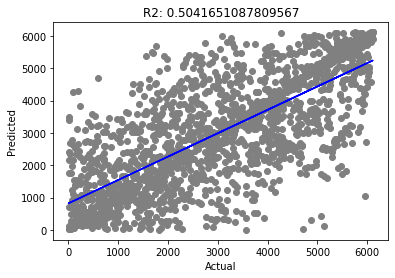

In [6]:
#DecisionTreeClassifier
#Import the essential libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)

X = df[['Sex', 'Country', 'Age', 'EDU', 'Components', 'Time']].values
y = df[['Value']].values

X_train, X_test, y_train, y_test = train_test_split(X, encoded, test_size = 0.3, random_state = 0)

clf_dtc = DecisionTreeClassifier(random_state=0)

#Train the model using the training set
fit_clf = clf_dtc.fit(X_train, y_train, sample_weight=None, check_input=True, X_idx_sorted='deprecated')

#Make the predictions
y_pred = clf_dtc.predict(X_test, check_input=True)

#Evaluate the model
print("Accuracy = ", r2_score(y_test,y_pred))

#Scatter plot
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, color = 'grey')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')


#regression line
y_test, y_pred = y_test.reshape(-1,1), y_pred.reshape(-1,1)
ax.plot(y_test, LinearRegression().fit(y_test, y_pred).predict(y_test), color = 'blue')
ax.set_title('R2: ' + str(r2_score(y_test, y_pred)))
plt.show()



# Random Forest Classifier

r2_score =  -0.198946067169941


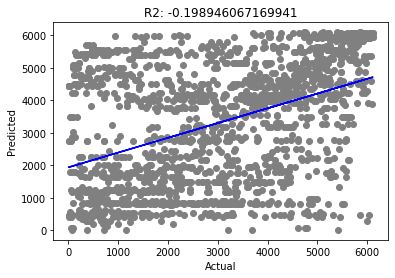

In [7]:
#Random Forest Classifier
#Import the essential libraries
from sklearn.ensemble import RandomForestClassifier

X = df[['Sex', 'Country', 'Age', 'EDU', 'Components', 'Time']]
y = df['Value'].values

clf_random = RandomForestClassifier(max_depth=2, random_state=0)

#Train the Model
clf_random.fit(X_train, y_train)

#Make the predictions
y_pred = clf_random.predict(X_test)

#Evaluate the model
print("r2_score = ", r2_score(y_test,y_pred))

#Scatter plot
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, color = 'grey')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')


#regression line
y_test, y_pred = y_test.reshape(-1,1), y_pred.reshape(-1,1)
ax.plot(y_test, LinearRegression().fit(y_test, y_pred).predict(y_test), color = 'blue')
ax.set_title('R2: ' + str(r2_score(y_test, y_pred)))
plt.show()



# Neural Network Keras

134/134 [==============================] - 1s 1ms/step - loss: 298.9525 - accuracy: 0.0000e+00
r2_score =  -1.2138958981079413


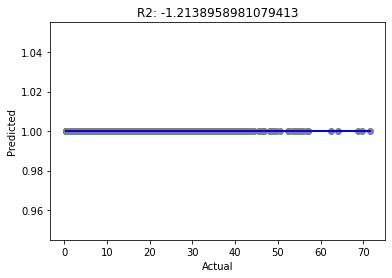

In [8]:
#Neural Network using Keras
#Import the essential libraries
from keras.models import Sequential
from keras.layers import Dense

X = df[['Sex', 'Country', 'Age', 'EDU', 'Components', 'Time']]
y = df[['Value']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=6, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
model.fit(X_train, y_train)

#Make the predictions with the model
y_pred = (model.predict(X_test) > 0.5).astype(int)

print("r2_score = ", r2_score(y_test,y_pred))

#Scatter plot
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, color = 'grey')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')


#regression line
y_test, y_pred = y_test.reshape(-1,1), y_pred.reshape(-1,1)
ax.plot(y_test, LinearRegression().fit(y_test, y_pred).predict(y_test), color = 'blue')
ax.set_title('R2: ' + str(r2_score(y_test, y_pred)))
plt.show()

# Oblique Decision Tree 

r2_score =  0.9223308208183536


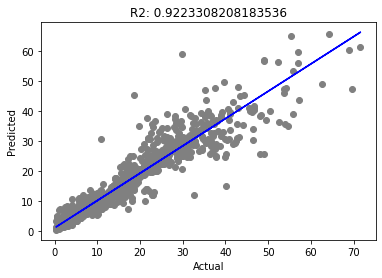

In [9]:
#Oblique Decision Tree
#Import the essential libraries
from sklearn.ensemble import BaggingRegressor
from scikit_obliquetree.HHCART import HouseHolderCART
from scikit_obliquetree.segmentor import MSE, MeanSegmentor

reg = BaggingRegressor(
    HouseHolderCART(MSE(), MeanSegmentor(), max_depth=3),
    n_estimators=100,
    n_jobs=-1,
)

X = df[['Sex', 'Country', 'Age', 'EDU', 'Components', 'Time']]
y = df['Value'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#Train the model using the training set
fit_clf = reg.fit(X_train, y_train)

#Make the predictions
y_pred = reg.predict(X_test)

#Evaluate the model
print("r2_score = ", r2_score(y_test,y_pred))

#Scatter plot
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, color = 'grey')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')


#regression line
y_test, y_pred = y_test.reshape(-1,1), y_pred.reshape(-1,1)
ax.plot(y_test, LinearRegression().fit(y_test, y_pred).predict(y_test), color = 'blue')
ax.set_title('R2: ' + str(r2_score(y_test, y_pred)))
plt.show()